In [1]:
import zntrack
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
dft_C = [
    zntrack.from_rev("locality_C_CP2KSinglePoint_1"),
    zntrack.from_rev("locality_C_CP2KSinglePoint_2"),
    zntrack.from_rev("locality_C_CP2KSinglePoint_3"),
    zntrack.from_rev("locality_C_CP2KSinglePoint_4"),
    zntrack.from_rev("locality_C_CP2KSinglePoint_5"),
    zntrack.from_rev("locality_C_CP2KSinglePoint_6"),
    zntrack.from_rev("locality_C_CP2KSinglePoint_7"),
]
dft_H = [
    zntrack.from_rev("locality_H_CP2KSinglePoint_1"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_2"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_3"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_4"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_5"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_6"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_7"),
]
dft_O = [
    zntrack.from_rev("locality_O_CP2KSinglePoint_1"),
    zntrack.from_rev("locality_O_CP2KSinglePoint_2"),
    zntrack.from_rev("locality_O_CP2KSinglePoint_3"),
    zntrack.from_rev("locality_O_CP2KSinglePoint_4"),
    zntrack.from_rev("locality_O_CP2KSinglePoint_5"),
    zntrack.from_rev("locality_O_CP2KSinglePoint_6"),
    zntrack.from_rev("locality_O_CP2KSinglePoint_7"),
]
dft_S = [
    zntrack.from_rev("locality_S_CP2KSinglePoint_1"),
    zntrack.from_rev("locality_S_CP2KSinglePoint_2"),
    zntrack.from_rev("locality_S_CP2KSinglePoint_3"),
    zntrack.from_rev("locality_S_CP2KSinglePoint_4"),
    zntrack.from_rev("locality_S_CP2KSinglePoint_5"),
    zntrack.from_rev("locality_S_CP2KSinglePoint_6"),
    zntrack.from_rev("locality_S_CP2KSinglePoint_7"),
]

2023-08-06 21:25:18,160 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


In [3]:
dft_H[0].atoms[0].get_chemical_symbols()

['C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'S',
 'O',
 'C',
 'H',
 'H',
 'H'

In [5]:
# Replace this with your actual dataset
from scipy import stats

def t_confidence_interval(data):
    """Returns the confidence interval for the given data and significance level.
    """
    alpha = 0.05  # Desired significance level (e.g., 95% confidence interval)
    df = len(data) - 1

    sample_variance = np.var(data, ddof=1)
    lower_chi2 = stats.chi2.ppf(alpha / 2, df)
    upper_chi2 = stats.chi2.ppf(1 - alpha / 2, df)

    lower_bound = np.sqrt((df * sample_variance) / upper_chi2)
    # upper_bound = np.sqrt((df * sample_variance) / lower_chi2)

    return np.std(data) - lower_bound

def get_values(data, item=0):
    results = []
    for node in data:
        forces = np.array([x.get_forces() for x in node.atoms])
        val = np.linalg.norm(forces[:, item], axis=1)
        results.append([np.std(val, ddof=1), t_confidence_interval(val)])
    return np.array(results)


In [6]:
c = get_values(dft_C, item=0)
s = get_values(dft_S, item=1)
o = get_values(dft_O, item=2)
h = get_values(dft_H, item=4)

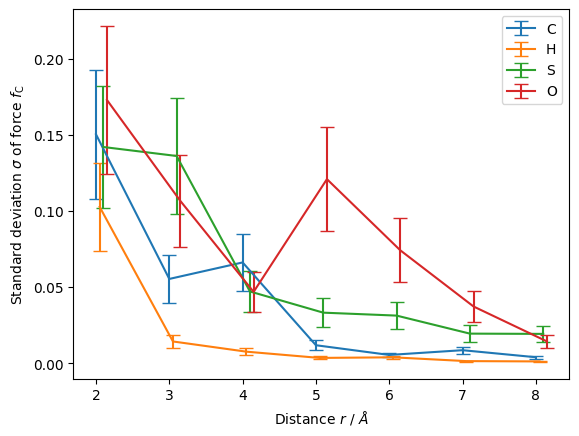

In [13]:
fig, ax = plt.subplots()
ax.errorbar(x=list(range(2, len(c)+2)), y=c[:, 0], yerr=c[:, 1], capsize=5, label="C")
ax.errorbar(x=[x+0.05 for x in range(2, len(h)+2)], y=h[:, 0], yerr=h[:, 1], capsize=5, label="H")
ax.errorbar(x=[x+0.1 for x in range(2, len(s)+2)], y=s[:, 0], yerr=s[:, 1], capsize=5, label="S")
ax.errorbar(x=[x+0.15 for x in range(2, len(o)+2)], y=o[:, 0], yerr=o[:, 1], capsize=5, label="O")
ax.set_ylabel(rf"Standard deviation $\sigma$ of force $f_\mathrm{{{'C'}}}$")
ax.legend()
ax.set_xlabel(r"Distance $r ~ / ~ \AA$")
fig.savefig("locality.png", bbox_inches="tight")

In [10]:
stds = []

vals = []

for n in dft:
    forces = np.array([x.get_forces() for x in n.atoms])
    val = np.linalg.norm(forces[:, 0], axis=1)
    vals.append(val)
    # stds.append([np.std(val, ddof=1), scipy.stats.sem(val)])
    # stds.append([np.mean(val), np.std(val)])
    stds.append([np.std(val), t_confidence_interval(val)])
    # stds.append(_compute_std_leave_one_out(np.linalg.norm(forces[:, 0], axis=1)))
    # # stds.append(_compute_std_leave_one_out(forces[:, 0, 0]))

stds = np.array(stds)

In [11]:
vals[0]

array([0.13464309, 0.37424702, 0.35955527, 0.07982055, 0.23051374,
       0.16824341, 0.49519025])